# SKILL_CRAFT_TECHNOLOGY:TASK_4

### TASK:
### Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.


#### importing important libraries

In [19]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report



#### loading dataset

In [20]:
data=pd.read_csv("clean_accident_dataset.csv")
data

,Start_Time,Weather_Condition,Road_Condition,Start_Lat,Start_Lng
0,01-01-2023 00:00,Clear,Dry,34.05,-118.25
1,01-01-2023 01:00,Rain,Wet,34.06,-118.24
2,01-01-2023 02:00,Cloudy,Snowy,34.07,-118.23
3,01-01-2023 03:00,Fog,Icy,34.08,-118.22
4,01-01-2023 04:00,Snow,Gravel,34.09,-118.21
...,...,...,...,...,...
95,04-01-2023 23:00,Clear,Dry,34.05,-118.25
96,05-01-2023 00:00,Rain,Wet,34.06,-118.24
97,05-01-2023 01:00,Cloudy,Snowy,34.07,-118.23
98,05-01-2023 02:00,Fog,Icy,34.08,-118.22


#### describing the datset

In [21]:
data.describe()

,Start_Lat,Start_Lng
count,100.000000,100.000000
mean,34.070000,-118.230000
std,0.014213,0.014213
min,34.050000,-118.250000
25%,34.060000,-118.240000
50%,34.070000,-118.230000
75%,34.080000,-118.220000
max,34.090000,-118.210000


#### Getting information about dataset

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Start_Time         100 non-null    object 
 1   Weather_Condition  100 non-null    object 
 2   Road_Condition     100 non-null    object 
 3   Start_Lat          100 non-null    float64
 4   Start_Lng          100 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.0+ KB


#### checking null values

In [23]:
data.isnull().sum()

Start_Time           0
Weather_Condition    0
Road_Condition       0
Start_Lat            0
Start_Lng            0
dtype: int64

In [24]:
# Convert Start_Time to datetime format
data['Start_Time'] = pd.to_datetime(data['Start_Time'])

# Extract hour for time of day analysis
data['Hour'] = data['Start_Time'].dt.hour

#### 1. Accidents by Time of Day


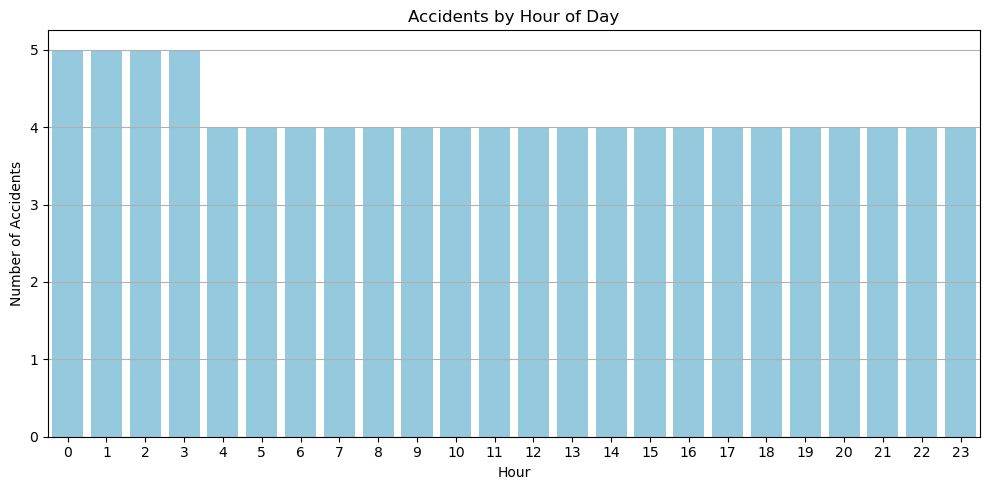

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=data, color='skyblue')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

####  2. Accidents by Weather Condition


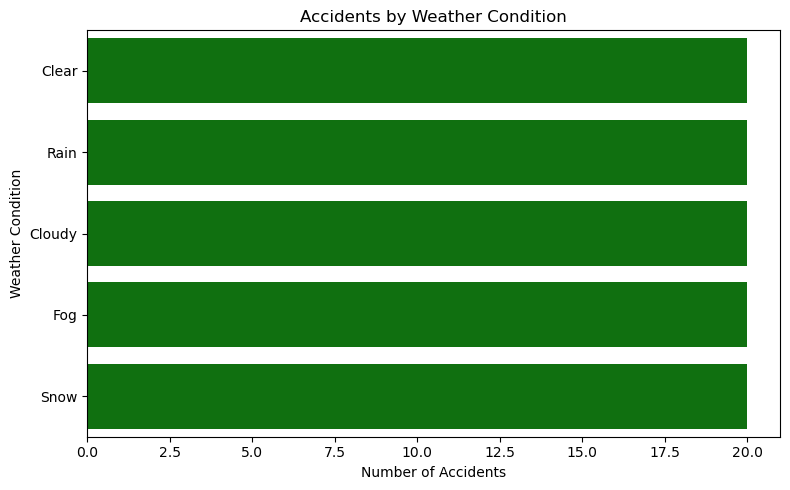

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Weather_Condition',data=data, order=data['Weather_Condition'].value_counts().index, color='green')
plt.title('Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

#### 3. Accidents by Road Condition


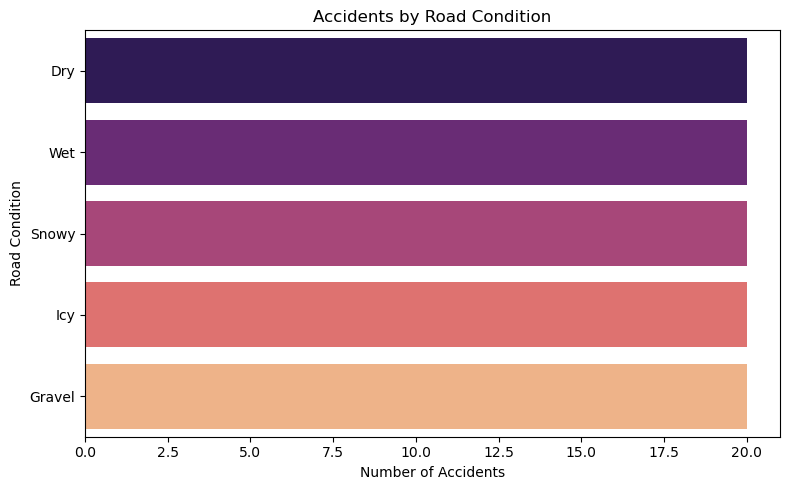

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Road_Condition', data=data, order=data['Road_Condition'].value_counts().index,hue='Road_Condition', palette='magma')
plt.title('Accidents by Road Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Condition')
plt.tight_layout()
plt.show()

In [36]:
print(data[['Start_Lat', 'Start_Lng']].head())
print(data[['Start_Lat', 'Start_Lng']].describe())

   Start_Lat  Start_Lng
0      34.05    -118.25
1      34.06    -118.24
2      34.07    -118.23
3      34.08    -118.22
4      34.09    -118.21
        Start_Lat   Start_Lng
count  100.000000  100.000000
mean    34.070000 -118.230000
std      0.014213    0.014213
min     34.050000 -118.250000
25%     34.060000 -118.240000
50%     34.070000 -118.230000
75%     34.080000 -118.220000
max     34.090000 -118.210000


#### 4.Plot the KDE heatmap





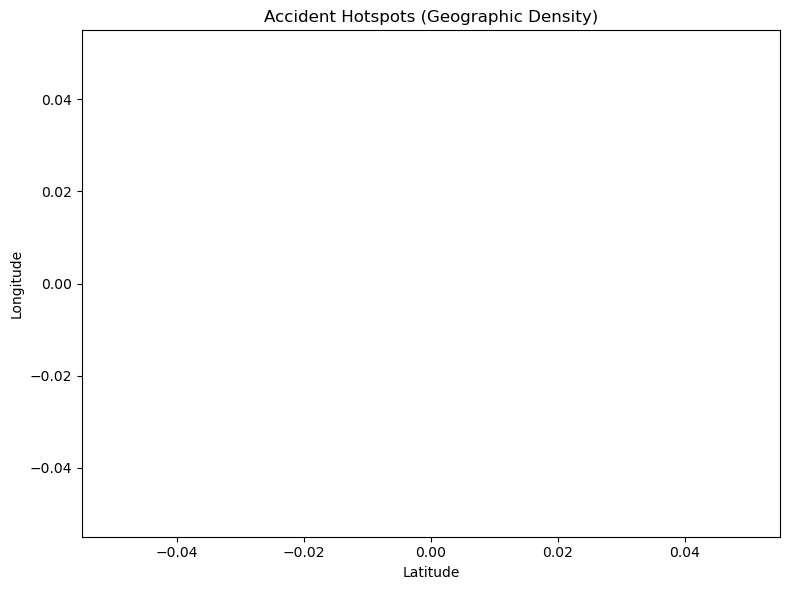

In [38]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=data['Start_Lat'],
    y=data['Start_Lng'],
    cmap="Reds",
    fill=True,
    bw_adjust=0.3,
    warn_singular=False
)
plt.title('Accident Hotspots (Geographic Density)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.tight_layout()
plt.show()
